<a href="https://colab.research.google.com/github/74527mohammad/Python/blob/main/Dcsn_Tree_Fraud_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

df = pd.read_csv("/content/Fraud_check.csv")

In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
df["Taxable.Income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [ ]:
df = pd.get_dummies(df,columns=["Undergrad","Marital.Status","Urban"])

In [ ]:
df["TaxInc"] = pd.cut(df["Taxable.Income"],bins=[10003,30000,99619],labels=["Risky","Good"])

In [ ]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0             68833            50047               10             1   
1             33700           134075               18             0   
2             36925           160205               30             1   
3             50190           193264               15             0   
4             81002            27533               28             1   
..              ...              ...              ...           ...   
595           76340            39492                7             0   
596           69967            55369                2             0   
597           47334           154058                0             1   
598           98592           180083               17             0   
599           96519           158137               16             1   

     Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0                0                        0                       0   
1    

In [ ]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first = True)

In [ ]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxInc_Good
0,68833,50047,10,1,0,0,0,1,0,1,1
1,33700,134075,18,0,1,1,0,0,0,1,1
2,36925,160205,30,1,0,0,1,0,0,1,1
3,50190,193264,15,0,1,0,0,1,0,1,1
4,81002,27533,28,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,1
596,69967,55369,2,0,1,1,0,0,0,1,1
597,47334,154058,0,1,0,1,0,0,0,1,1
598,98592,180083,17,0,1,0,1,0,1,0,1


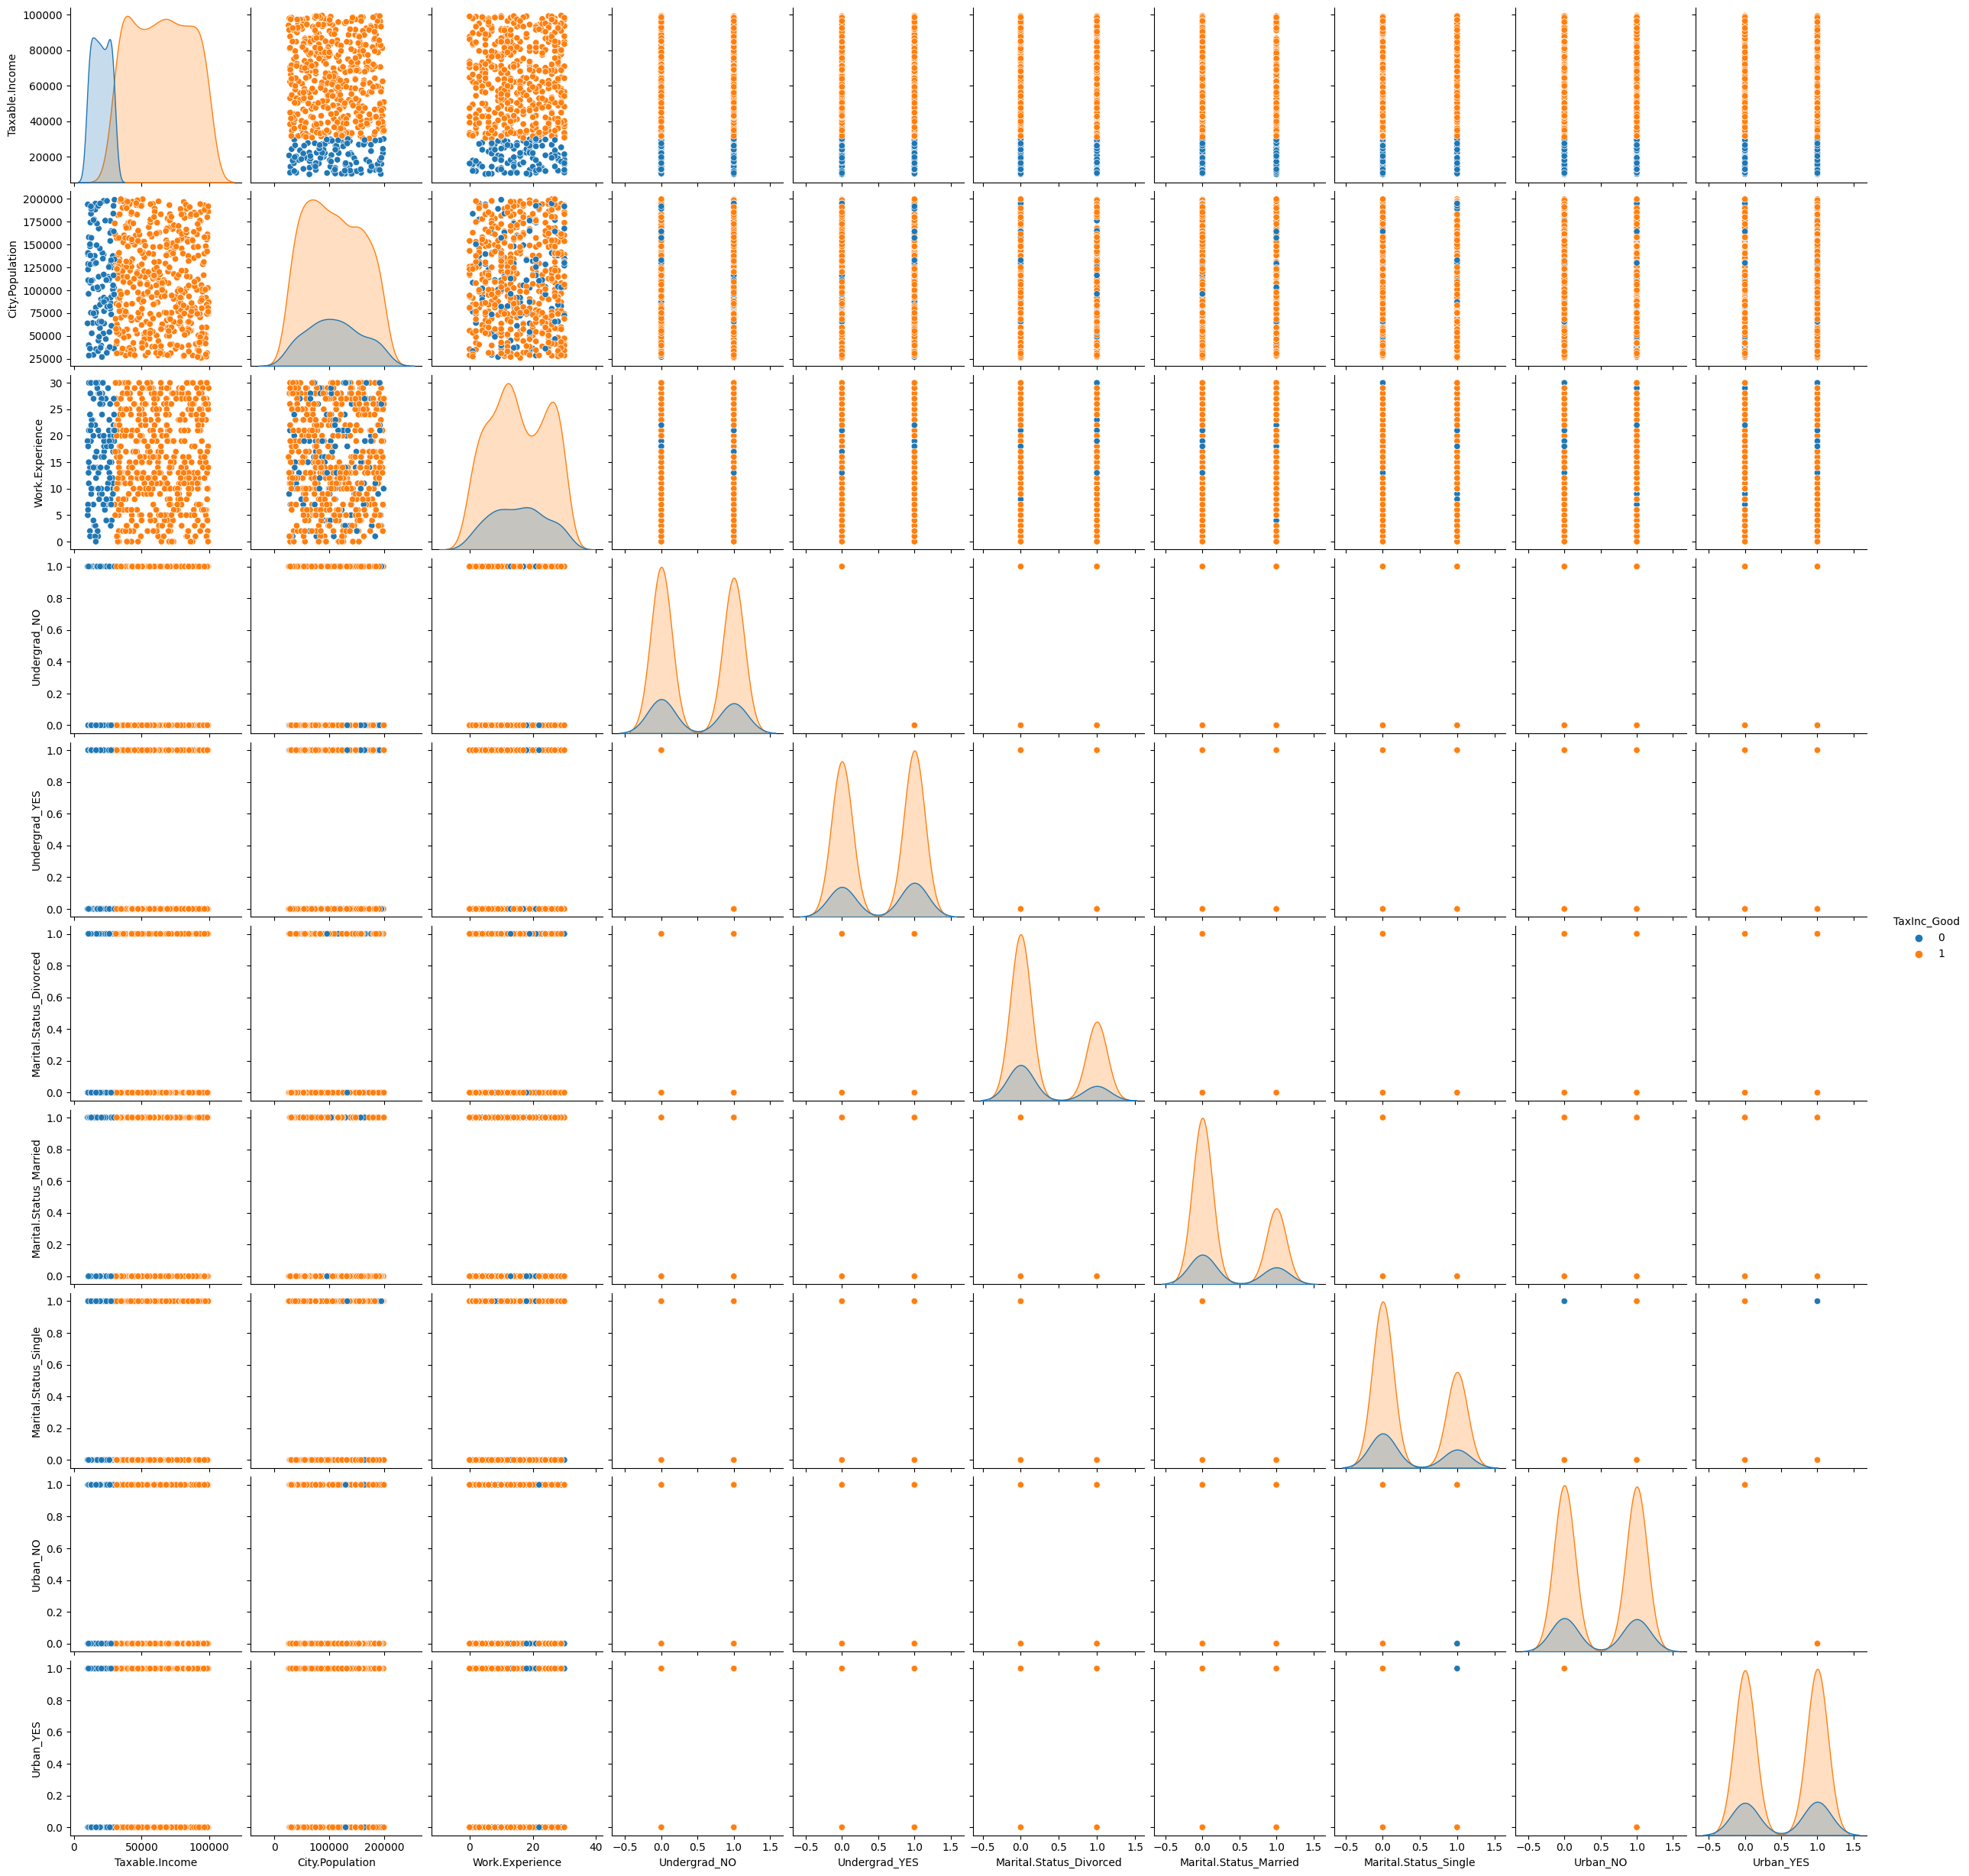

In [ ]:
import seaborn as sns
sns.pairplot(data=df,hue = "TaxInc_Good")

In [ ]:
def norm_func(i):
  x =(i - i.min())/(i.max()-i.min())
  return x

In [ ]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxInc_Good
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
df_norm.describe()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxInc_Good
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.476832,0.518611,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333,0.793333
std,0.286496,0.294738,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406,0.405252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.236713,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.463879,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.714575,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtest,xtrain,ytest,ytrain = train_test_split(x , y , test_size = 0.2, random_state = 0)

In [ ]:
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [ ]:
df.drop(["Taxable.Income"],axis = 1 , inplace = True)

In [ ]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
for column_name in df.columns:
  if df[column_name].dtype == object:
    df[column_name] = label_encoder.fit_transform(df[column_name])
  else:
    pass

In [ ]:
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [ ]:
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [ ]:
model.estimators_
model.classes_
model.n_classes_

2

In [ ]:
model.n_outputs_

1

In [ ]:
model.oob_score_

0.66875

In [ ]:
prediction = model.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [ ]:
np.mean(prediction == y_train)

0.9854166666666667

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [ ]:
pred_test = model.predict(x_test)
print(pred_test)

[1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0]


In [ ]:
acc = accuracy_score(y_test,pred_test)

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [ ]:
tree = model.estimators_[5]

In [ ]:
dot_data = StringIO()
export_graphviz(tree,out_file=dot_data,filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)


In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn import tree

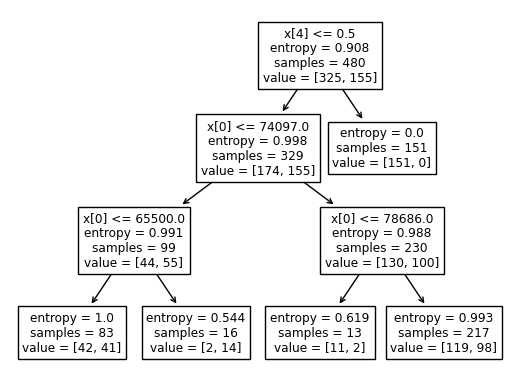

In [ ]:
tree.plot_tree(model);

In [ ]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'TaxInc_Good']

[Text(0.625, 0.875, 'Marital.Status_Single <= 0.5\nentropy = 0.908\nsamples = 480\nvalue = [325, 155]\nclass = 1'),
 Text(0.5, 0.625, 'population <= 74097.0\nentropy = 0.998\nsamples = 329\nvalue = [174, 155]\nclass = 1'),
 Text(0.25, 0.375, 'population <= 65500.0\nentropy = 0.991\nsamples = 99\nvalue = [44, 55]\nclass = 0'),
 Text(0.125, 0.125, 'entropy = 1.0\nsamples = 83\nvalue = [42, 41]\nclass = 1'),
 Text(0.375, 0.125, 'entropy = 0.544\nsamples = 16\nvalue = [2, 14]\nclass = 0'),
 Text(0.75, 0.375, 'population <= 78686.0\nentropy = 0.988\nsamples = 230\nvalue = [130, 100]\nclass = 1'),
 Text(0.625, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [11, 2]\nclass = 1'),
 Text(0.875, 0.125, 'entropy = 0.993\nsamples = 217\nvalue = [119, 98]\nclass = 1'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 151\nvalue = [151, 0]\nclass = 1')]

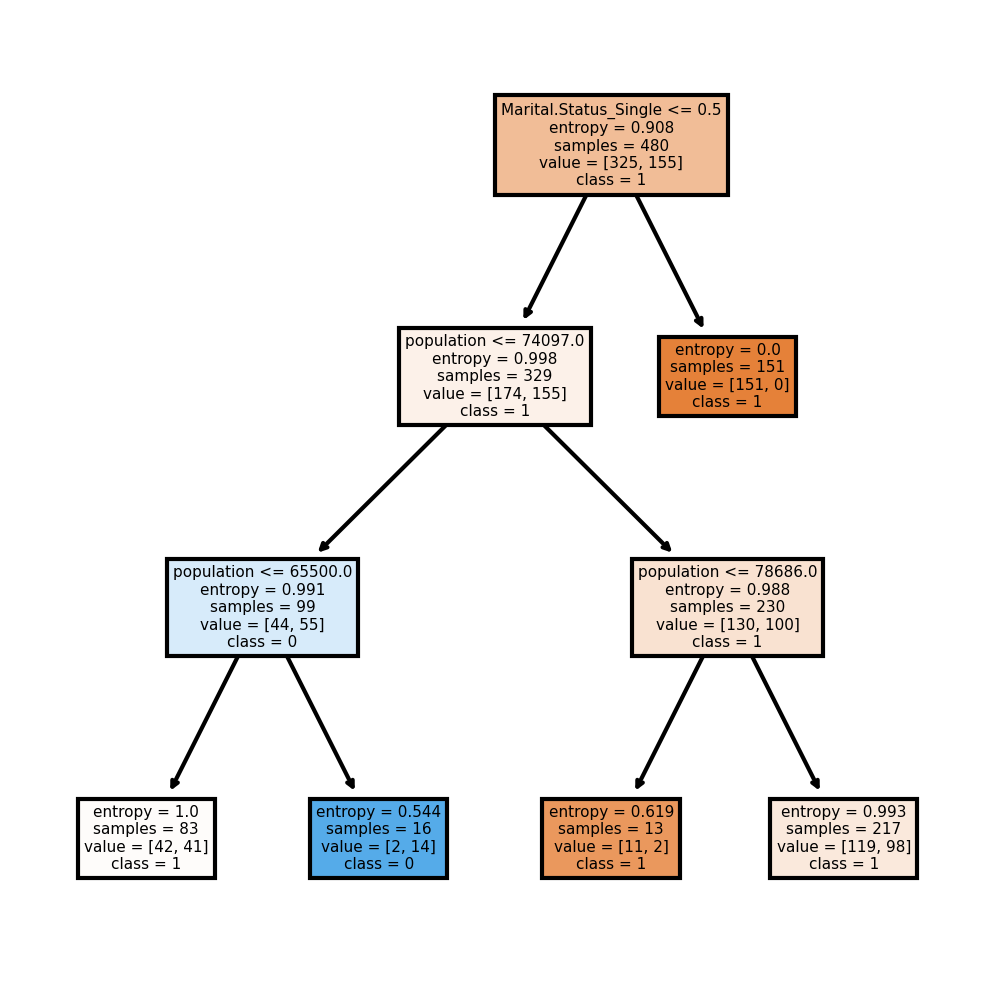

In [ ]:
f_names=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
c_names=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = f_names,
               class_names=c_names,
               filled = True)

In [ ]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    114
1      6
dtype: int64

In [ ]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1
Marital.Status_Married,,
0,78,3
1,36,3


In [ ]:
  np.mean(preds==y_test)

0.675

In [ ]:
model_gini = DecisionTreeClassifier(criterion = "gini",max_depth=3)

In [ ]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred = model.predict(x_test)
np.mean(pred == y_test)

0.675

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df.values
X = array[:,0:3]
Y = array[:,3]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)


In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
model.score(x_test,y_test)

-0.8797468354430387